In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading Train data set
train=pd.read_csv("train_data.csv")

train_beneficiarydata=pd.read_csv("train_beneficiarydata.csv")

train_inpatientdata=pd.read_csv("Train_Inpatientdata.csv")

train_outpatientdata=pd.read_csv("Train_Outpatientdata.csv")

In [3]:
##Replacing 2 with 0 for chronic conditions ,that means chroniv conditions which has values will be replaced with 
#No i.e. 0 and the RenalDisease Indicator to yes as 1

train_beneficiarydata = train_beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2, 'Gender': 2 }, 0)

train_beneficiarydata = train_beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1).astype({'RenalDiseaseIndicator': 'int64'})

In [4]:
#Checking the shape of the beneficiary data information

print(train_beneficiarydata.shape)
train_beneficiarydata.head()

(138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,0,1,0,39,280,12,12,...,0,0,0,0,0,0,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,0,0,1,0,0,0,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,0,1,1,1,1,0,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,0,1,0,0,0,0,0,0,1790,1200


In [5]:
#Checking the shape and displaying the information of the TRAIN PROVIDER AND POTENTIAL FRAUD
print(train.shape)
train.head()

(5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [6]:
#Checking the shape and data present in the IN-PATIENTdata
print(train_inpatientdata.shape)
train_inpatientdata.head()

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [7]:
#Checking the shape and data present in the OUT-PATIENTdata
print(train_outpatientdata.shape)
train_outpatientdata.head()

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [8]:
#exploratory analysis for the Fraud test distribution from the train table data
#plt.title("Potential Fraud Test distribution")
#train.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
#plt.xlabel('Status')
#plt.ylabel('Count')
#plt.show()

In [9]:
# PRE-PROCESSING 
#Adding features and combine/Merge of the datasets

#Add Flag column 'WhetherDead' using DOD values to tell whether beneficiary is dead(1) on not Dead(0)

train_beneficiarydata['WhetherDead']= 0
train_beneficiarydata.loc[train_beneficiarydata.DOD.notna(),'WhetherDead'] = 1
print(train_beneficiarydata.shape)
train_beneficiarydata.head(30)

(138556, 26)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,0
1,BENE11002,1936-09-01,NaN,0,1,0,39,280,12,12,...,0,0,0,0,0,0,0,30,50,0
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,0,1,0,0,0,0,0,90,40,0
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,1,1,1,1,0,0,0,1810,760,0
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,1,0,0,0,0,0,0,1790,1200,0
5,BENE11006,1976-09-01,NaN,0,1,0,23,810,12,12,...,0,0,0,0,0,0,0,500,0,0
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,0,1,1,0,0,0,1490,160,1
7,BENE11008,1934-02-01,NaN,0,1,0,15,140,12,12,...,1,0,0,0,0,0,0,30,0,0
8,BENE11009,1929-06-01,NaN,1,1,1,44,230,12,12,...,1,0,0,0,0,0,0,100,0,0
9,BENE11010,1936-07-01,NaN,0,1,0,41,30,12,12,...,1,1,1,0,0,0,0,1170,660,0


In [10]:
#Adding train numeric variable.
#Here we are displaying the categorical value to numeric value where if it the potentialFraud is yes then the value is 1 else 0
train["PotentialFraudNumeric"] = np.where(train.PotentialFraud == "Yes", 1, 0)
print(train.shape)
train.head()

(5410, 3)


,Provider,PotentialFraud,PotentialFraudNumeric
0,PRV51001,No,0
1,PRV51003,Yes,1
2,PRV51004,No,0
3,PRV51005,Yes,1
4,PRV51007,No,0


In [11]:
#Merging the Inpatient and Outpatient datasets as there are some columns which are common in both the datasets. 

MediCare = pd.merge(train_inpatientdata, train_outpatientdata, left_on = [ x for x in train_outpatientdata.columns if x in train_inpatientdata.columns], 
                    right_on = [ x for x in train_outpatientdata.columns if x in train_inpatientdata.columns], how = 'outer')
print(MediCare.shape)
MediCare.head(15)

(558211, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [12]:
#Here we are Merging the Medicare(IN-PATIENT AND OUT-PATIENT DATA) with the patient information table (BENEFICIARY DATA) as  
#BENEFICIARY ID (BeneID) is common in both the table.

data = pd.merge(MediCare, train_beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')
print(data.shape)
data.head()

(558211, 55)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,0,1,1,36000,3204,60,70,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,0,1,1,36000,3204,60,70,0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,0,1,1,36000,3204,60,70,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,0,0,1,1,5000,1068,250,320,0
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,...,1,0,0,1,1,5000,1068,250,320,0


In [13]:
#data is our final table which we will be using in rest of the program to implement the models, finding accuracy, and predict the
#potential fradulent
#There are 55 columns and 558211 records in the dataset.
#below are the steps taken to normalise the table more efficiently to predict the model

In [14]:
#Create a new variable "NumPhysicians" with number of physians(from 0 to 3): 
#'AttendingPhysician' not missing + 'OperatingPhysician' not missing + 'OtherPhysician' not missing
#below code provides the information about the 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'.
def len_check(data , l):
    S = dict()
    for i in data.columns:
         S[i] = [x for x in data.loc[ np.any(data[[i]].notnull().to_numpy(), axis = 1)][i].unique() if (len(str(x)) < l | len(str(x)) > l ) ]
    
    print(S)

In [15]:
len_check(data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']], len(''))

{'AttendingPhysician': [], 'OperatingPhysician': [], 'OtherPhysician': []}


In [16]:
# This function considers the unique value among the three and displays the count 
def uniq(a):
    return np.array([len(set([i for i in x[~pd.isnull(x)]])) for x in a.values])

In [17]:
### Create new variable NumPhysicians which specifies the unique count of the 'AttendingPhysician', 'OperatingPhysician',
#'OtherPhysician'
#and drop 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'
data['NumPhysicians'] = uniq(data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']]) 
data = data.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis = 1)

In [18]:
#Checking the shape and data present in the "data" table which contains new columns WhetherDead and NumPhysicians
print(data.shape)
data.head()

(558211, 53)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumPhysicians
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,2009-04-12,7866,1068.0,2009-04-18,...,1,0,1,1,36000,3204,60,70,0,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,2009-08-31,6186,1068.0,2009-09-02,...,1,0,1,1,36000,3204,60,70,0,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,2009-09-17,29590,1068.0,2009-09-20,...,1,0,1,1,36000,3204,60,70,0,2
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,2009-02-14,431,1068.0,2009-02-22,...,0,0,1,1,5000,1068,250,320,0,3
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,NaN,78900,0.0,NaN,...,0,0,1,1,5000,1068,250,320,0,1


In [19]:
#In the table there are 6 ClmProcedureCode , here we are reducing it to as one column by creating column name as NumProc 
#Count number of procedures 'NumProc' for each claim.

ClmProcedure_vars = ['ClmProcedureCode_{}'.format(x) for x in range(1,7)]
### Create new variable 
data['NumProc'] = data[ClmProcedure_vars].notnull().to_numpy().sum(axis = 1)

In [20]:
#Checking the shape and data present in the "data" which has NumProc table added 
print(data.shape)
data.head()

(558211, 54)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumPhysicians,NumProc
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,2009-04-12,7866,1068.0,2009-04-18,...,0,1,1,36000,3204,60,70,0,1,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,2009-08-31,6186,1068.0,2009-09-02,...,0,1,1,36000,3204,60,70,0,1,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,2009-09-17,29590,1068.0,2009-09-20,...,0,1,1,36000,3204,60,70,0,2,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,2009-02-14,431,1068.0,2009-02-22,...,0,1,1,5000,1068,250,320,0,3,1
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,NaN,78900,0.0,NaN,...,0,1,1,5000,1068,250,320,0,1,0


In [21]:
#code for dropping the 6 ClmProcedureCode 
keep = ['BeneID', 'ClaimID', 'ClmAdmitDiagnosisCode', 'NumProc' ] + ClmProcedure_vars
### Checking if procedures is unique
print(data[keep].loc[data['NumProc'] != uniq( data[ClmProcedure_vars])])

data = data.drop(ClmProcedure_vars, axis = 1)

Empty DataFrame
Columns: [BeneID, ClaimID, ClmAdmitDiagnosisCode, NumProc, ClmProcedureCode_1, ClmProcedureCode_2, ClmProcedureCode_3, ClmProcedureCode_4, ClmProcedureCode_5, ClmProcedureCode_6]
Index: []


In [22]:
#Now we have 48 columns after removing the ClmProcedureCode columns
print(data.shape)

(558211, 48)


In [23]:
#In the table there are 10 ClmDiagnosisCode columns , here we are reducing it to as one column by creating column name as NumClaims 
#Count number of claims, extra reported claims and unique.

ClmDiagnosisCode_vars =['ClmAdmitDiagnosisCode'] + ['ClmDiagnosisCode_{}'.format(x) for x in range(1, 11)]

### Create new variable 
data['NumClaims'] = data[ClmDiagnosisCode_vars].notnull().to_numpy().sum(axis = 1)

In [24]:
#code for dropping the 6 ClmAdmitDiagnosisCode columns 
keep = ['BeneID', 'ClaimID', 'ClmAdmitDiagnosisCode', 'NumClaims'] + ClmDiagnosisCode_vars

### Create new variable 
data['NumClaims'] = data[ClmDiagnosisCode_vars].notnull().to_numpy().sum(axis = 1)

print(data[keep].loc[data['NumClaims'] != uniq( data[ClmDiagnosisCode_vars])].head())

       BeneID    ClaimID ClmAdmitDiagnosisCode  NumClaims  \
1   BENE11001   CLM66048                  6186          4   
35  BENE11037  CLM283913                 42731          2   
38  BENE11041   CLM54944                 49121          7   
39  BENE11041   CLM78682                 51881         10   
70  BENE11066   CLM75192                 59971         10   

   ClmAdmitDiagnosisCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
1                   6186               6186               2948   
35                 42731              42731                NaN   
38                 49121              49121               2752   
39                 51881              51881               2859   
70                 59971               5990              78829   

   ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
1               56400                NaN                NaN   
35                NaN                NaN                NaN   
38               7812              71690       

In [25]:
### if checking result of unique claims is not missing, we are going to add number of unique claims.
data['NumUniqueClaims'] = uniq(data[ClmDiagnosisCode_vars])

data['ExtraClm'] = data['NumClaims'] - data['NumUniqueClaims']

data = data.drop(ClmDiagnosisCode_vars, axis = 1)
data = data.drop(['NumClaims'], axis = 1)

In [26]:
#Checking the shape and data present in the "data" which has NumUniqueClaims and ExtraClm columns added
print(data.shape)
data.head(7)

(558211, 39)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AdmissionDt,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumPhysicians,NumProc,NumUniqueClaims,ExtraClm
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,2009-04-12,1068.0,2009-04-18,201,...,1,36000,3204,60,70,0,1,0,10,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,2009-08-31,1068.0,2009-09-02,750,...,1,36000,3204,60,70,0,1,1,3,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,2009-09-17,1068.0,2009-09-20,883,...,1,36000,3204,60,70,0,2,0,7,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,2009-02-14,1068.0,2009-02-22,067,...,1,5000,1068,250,320,0,3,1,10,0
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,NaN,0.0,NaN,NaN,...,1,5000,1068,250,320,0,1,0,6,0
5,BENE11011,CLM347780,2009-05-08,2009-05-08,PRV51012,50,NaN,0.0,NaN,NaN,...,1,5000,1068,250,320,0,2,0,2,0
6,BENE11011,CLM507201,2009-08-04,2009-08-04,PRV51063,80,NaN,0.0,NaN,NaN,...,1,5000,1068,250,320,0,1,0,4,0


In [27]:
#Convert Dates and calculate days for Claim and for Admission. Calculate patient age at time of claim.

data['AdmissionDt'] = pd.to_datetime(data['AdmissionDt'] , format = '%Y-%m-%d')
data['DischargeDt'] = pd.to_datetime(data['DischargeDt'],format = '%Y-%m-%d')

### Number of hospitalization days
data['AdmissionDays'] = ((data['DischargeDt'] - data['AdmissionDt']).dt.days) + 1

In [28]:
data['ClaimStartDt'] = pd.to_datetime(data['ClaimStartDt'], format = '%Y-%m-%d')
data['ClaimEndDt'] = pd.to_datetime(data['ClaimEndDt'], format = '%Y-%m-%d')

### Number of claim days 
data['ClaimDays'] = ((data['ClaimEndDt'] - data['ClaimStartDt']).dt.days) + 1

In [29]:
print(data['ClaimStartDt'],data['ClaimEndDt'] )

0        2009-04-12
1        2009-08-31
2        2009-09-17
3        2009-02-14
4        2009-01-18
            ...    
558206   2009-08-06
558207   2009-08-29
558208   2009-09-24
558209   2009-10-18
558210   2009-11-17
Name: ClaimStartDt, Length: 558211, dtype: datetime64[ns] 0        2009-04-18
1        2009-09-02
2        2009-09-20
3        2009-02-22
4        2009-01-18
            ...    
558206   2009-08-06
558207   2009-08-29
558208   2009-09-24
558209   2009-10-18
558210   2009-11-18
Name: ClaimEndDt, Length: 558211, dtype: datetime64[ns]


In [30]:
from datetime import datetime
data['DOB'] = pd.to_datetime(data['DOB'],format = '%Y/%m/%d')
print(data['DOB'])
data['DOD'] = pd.to_datetime(data['DOD'],format = '%Y/%m/%d')
print(data['DOD'])

0        1943-01-01
1        1943-01-01
2        1943-01-01
3        1914-03-01
4        1914-03-01
            ...    
558206   1952-04-01
558207   1952-04-01
558208   1952-04-01
558209   1952-04-01
558210   1952-04-01
Name: DOB, Length: 558211, dtype: datetime64[ns]
0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
558206   NaT
558207   NaT
558208   NaT
558209   NaT
558210   NaT
Name: DOD, Length: 558211, dtype: datetime64[ns]


In [31]:
data['Age'] = round(((data['ClaimStartDt'] - data['DOB']).dt.days + 1)/365.25)
print(data['Age'])

0         66.0
1         67.0
2         67.0
3         95.0
4         95.0
          ... 
558206    57.0
558207    57.0
558208    57.0
558209    58.0
558210    58.0
Name: Age, Length: 558211, dtype: float64


In [32]:
#Here we creating flag for DiagnosisGroupCode by creating Hospitalization flag 'Hospt'

data['Hospt'] = np.where(data.DiagnosisGroupCode.notnull(), 1, 0)
data = data.drop(['DiagnosisGroupCode'], axis = 1)

In [33]:
#Check the shape and information present in the data after adding Hospt column
print(data.shape)
data.head(10)

(558211, 42)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AdmissionDt,DeductibleAmtPaid,DischargeDt,DOB,...,OPAnnualDeductibleAmt,WhetherDead,NumPhysicians,NumProc,NumUniqueClaims,ExtraClm,AdmissionDays,ClaimDays,Age,Hospt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,2009-04-12,1068.0,2009-04-18,1943-01-01,...,70,0,1,0,10,0,7.0,7,66.0,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,2009-08-31,1068.0,2009-09-02,1943-01-01,...,70,0,1,1,3,1,3.0,3,67.0,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,2009-09-17,1068.0,2009-09-20,1943-01-01,...,70,0,2,0,7,0,4.0,4,67.0,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,2009-02-14,1068.0,2009-02-22,1914-03-01,...,320,0,3,1,10,0,9.0,9,95.0,1
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,NaT,0.0,NaT,1914-03-01,...,320,0,1,0,6,0,NaN,1,95.0,0
5,BENE11011,CLM347780,2009-05-08,2009-05-08,PRV51012,50,NaT,0.0,NaT,1914-03-01,...,320,0,2,0,2,0,NaN,1,95.0,0
6,BENE11011,CLM507201,2009-08-04,2009-08-04,PRV51063,80,NaT,0.0,NaT,1914-03-01,...,320,0,1,0,4,0,NaN,1,95.0,0
7,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,2009-08-13,1068.0,2009-08-30,1938-04-01,...,100,0,2,1,10,0,18.0,18,71.0,1
8,BENE11014,CLM523157,2009-08-13,2009-08-13,PRV56835,60,NaT,0.0,NaT,1938-04-01,...,100,0,1,0,1,0,NaN,1,71.0,0
9,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,2009-10-06,1068.0,2009-10-12,1940-06-01,...,840,0,1,1,10,0,7.0,7,69.0,1


In [34]:
### Check if there were any actions after death. 
data['DeadActions'] = np.where(np.any(np.array([ data[x] > data['DOD'] for x in ['AdmissionDt', 'DischargeDt', 'ClaimStartDt', 'ClaimEndDt']]), axis = 0), 1, 0)

print(data.loc[data['DeadActions'] > 0])

### If there is no actions after death date, we will drop this variable. 
data = data.drop(['AdmissionDt', 'DeadActions', 'DischargeDt', 'ClaimStartDt', 'ClaimEndDt', 'DOD', 'DOB'], axis = 1)

Empty DataFrame
Columns: [BeneID, ClaimID, ClaimStartDt, ClaimEndDt, Provider, InscClaimAmtReimbursed, AdmissionDt, DeductibleAmtPaid, DischargeDt, DOB, DOD, Gender, Race, RenalDiseaseIndicator, State, County, NoOfMonths_PartACov, NoOfMonths_PartBCov, ChronicCond_Alzheimer, ChronicCond_Heartfailure, ChronicCond_KidneyDisease, ChronicCond_Cancer, ChronicCond_ObstrPulmonary, ChronicCond_Depression, ChronicCond_Diabetes, ChronicCond_IschemicHeart, ChronicCond_Osteoporasis, ChronicCond_rheumatoidarthritis, ChronicCond_stroke, IPAnnualReimbursementAmt, IPAnnualDeductibleAmt, OPAnnualReimbursementAmt, OPAnnualDeductibleAmt, WhetherDead, NumPhysicians, NumProc, NumUniqueClaims, ExtraClm, AdmissionDays, ClaimDays, Age, Hospt, DeadActions]
Index: []

[0 rows x 43 columns]


In [35]:
#Descriptive stats
data.describe(exclude = ['object'])

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,OPAnnualDeductibleAmt,WhetherDead,NumPhysicians,NumProc,NumUniqueClaims,ExtraClm,AdmissionDays,ClaimDays,Age,Hospt
count,558211.000000,557312.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,40474.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,78.421085,0.421162,1.255011,0.196786,25.446969,378.588195,11.931472,11.93877,0.401868,...,649.698745,0.007400,1.292981,0.053557,3.239150,0.033117,6.665168,2.727940,73.301277,0.072507
std,3821.534891,274.016812,0.493746,0.717437,0.397569,15.192784,265.215531,0.889712,0.78590,0.490276,...,1002.020811,0.085707,0.505266,0.280534,2.570114,0.178991,5.638538,4.904984,13.021602,0.259325
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,0.000000
25%,40.000000,0.000000,0.000000,1.000000,0.000000,11.000000,150.000000,12.000000,12.00000,0.000000,...,120.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,68.000000,0.000000
50%,80.000000,0.000000,0.000000,1.000000,0.000000,24.000000,350.000000,12.000000,12.00000,0.000000,...,340.000000,0.000000,1.000000,0.000000,2.000000,0.000000,5.000000,1.000000,74.000000,0.000000
75%,300.000000,0.000000,1.000000,1.000000,0.000000,38.000000,570.000000,12.000000,12.00000,1.000000,...,790.000000,0.000000,2.000000,0.000000,4.000000,0.000000,8.000000,1.000000,82.000000,0.000000
max,125000.000000,1068.000000,1.000000,5.000000,1.000000,54.000000,999.000000,12.000000,12.00000,1.000000,...,13840.000000,1.000000,3.000000,5.000000,11.000000,2.000000,36.000000,37.000000,101.000000,1.000000


In [36]:
data.shape

(558211, 36)

In [37]:
#Checking and impute missing records
data.isnull().sum()

BeneID                                  0
ClaimID                                 0
Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     899
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt          

In [38]:
## Fill missing results using 0
data = data.fillna(0).copy()
data.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'WhetherDead', 'NumPhysicians', 'NumProc',
       'NumUniqueClaims', 'ExtraClm', 'AdmissionDays', 'ClaimDays', 'Age',
       'Hospt'],
      dtype='object')

In [39]:
#Group by provider each column of the "data" table and creating a new data"df1"

### Sum all results
df1 = data.groupby(['Provider'], as_index = False)[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'RenalDiseaseIndicator', 
                                                  'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
                                                  'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 
                                                  'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
                                                  'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 
                                                  'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                                                  'ChronicCond_stroke', 'WhetherDead', 'NumPhysicians', 
                                                  'NumProc','NumUniqueClaims', 'ExtraClm', 'AdmissionDays',
                                                  'ClaimDays', 'Hospt']].sum()

In [40]:
df1.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,WhetherDead,NumPhysicians,NumProc,NumUniqueClaims,ExtraClm,AdmissionDays,ClaimDays,Hospt
0,PRV51001,104640,5340.0,8,15,19,17,5,10,9,...,8,6,0,32,3,91,0,30.0,61,5
1,PRV51003,605670,66286.0,29,56,80,64,10,41,54,...,38,12,1,156,48,761,10,382.0,617,62
2,PRV51004,52170,310.0,23,64,88,50,16,41,63,...,46,17,1,197,0,410,3,0.0,362,0
3,PRV51005,280910,3700.0,259,426,680,507,165,295,485,...,331,124,4,1409,0,3246,22,0.0,2433,0
4,PRV51007,33710,3264.0,11,26,40,22,12,16,29,...,22,12,1,81,1,231,1,19.0,141,3


In [41]:
#df1.to_csv("mergeddataversion1.csv")

In [42]:
#Considerign BeneID and ClaimID and creating "df2" table
### Count number of records
df2 = data[['BeneID', 'ClaimID']].groupby(data['Provider']).nunique().reset_index()

In [43]:
df2.head(15)

,Provider,BeneID,ClaimID
0,PRV51001,24,25
1,PRV51003,117,132
2,PRV51004,138,149
3,PRV51005,495,1165
4,PRV51007,58,72
5,PRV51008,36,43
6,PRV51011,53,58
7,PRV51012,31,48
8,PRV51013,44,46
9,PRV51014,25,30


In [44]:
### Calculate mean and store it in "df3" table
df3 = data.groupby(['Provider'], as_index = False)[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
                                                    'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
                                                    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age']].mean()

In [45]:
### Combine all together i.e. df1 ,df2, df3 and store in df
df = df2.merge(df1, on='Provider', how='left').merge(df3, on='Provider', how='left')
print(df.shape, train.shape)

(5410, 32) (5410, 3)


In [46]:
#Machine Learning for fraud detection

df1 = df.merge(train, on='Provider', how='left').drop(['Provider', 'PotentialFraudNumeric'], axis = 1)
df2 = df.merge(train, on='Provider', how='left').drop(['Provider', 'PotentialFraud'], axis = 1)
print(df.shape, train.shape)

(5410, 32) (5410, 3)


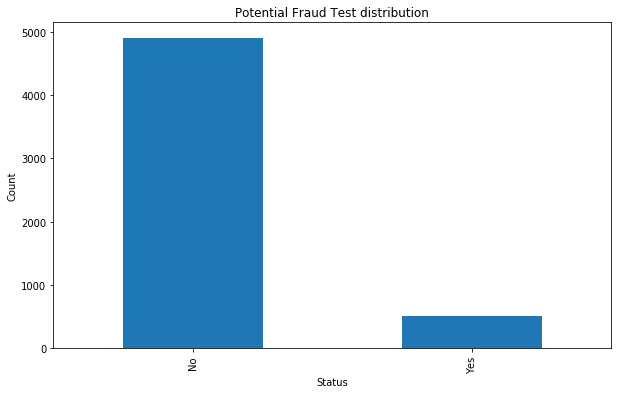

In [47]:
#exploratory analysis for the Fraud test distribution from the train table data
plt.title("Potential Fraud Test distribution")
train.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

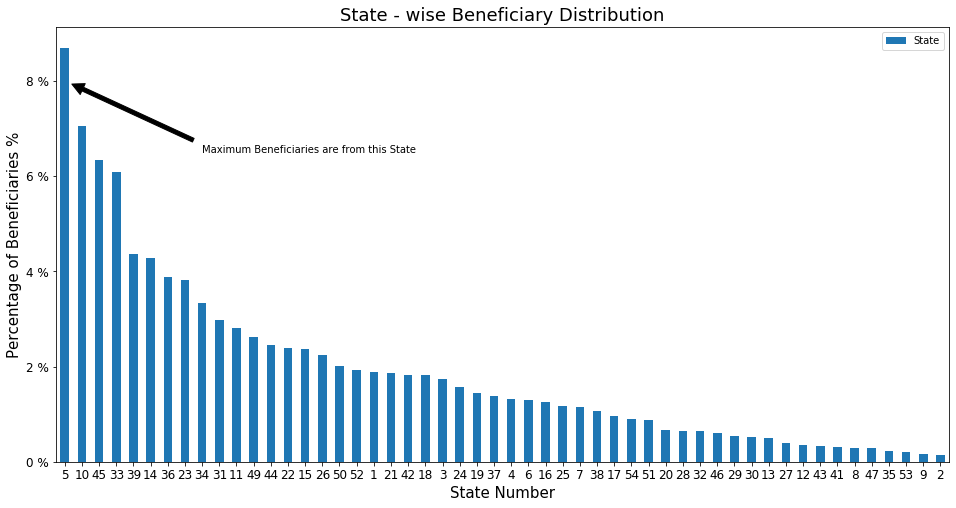

<Figure size 432x288 with 0 Axes>

In [48]:
#PLotting the frequencies of Statewise beneficiaries
count_States = pd.value_counts(train_beneficiarydata['State'], sort = True)
#print("Percent Distribution of Beneficieries per state:- \n",count_States*100/len(Train_Beneficiarydata))

#Drawing a barplot
(count_States*100/len(train_beneficiarydata)).plot(kind = 'bar', rot=0,figsize=(16,8),fontsize=12,legend=True)

#Giving titles and labels to the plot

plt.annotate('Maximum Beneficiaries are from this State', xy=(0.01,8), xytext=(8, 6.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.yticks(np.arange(0,10,2), ('0 %','2 %', '4 %', '6 %', '8 %', '10%'))
plt.title("State - wise Beneficiary Distribution",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)
plt.show()

plt.savefig('StateWiseBeneficiaryDistribution')

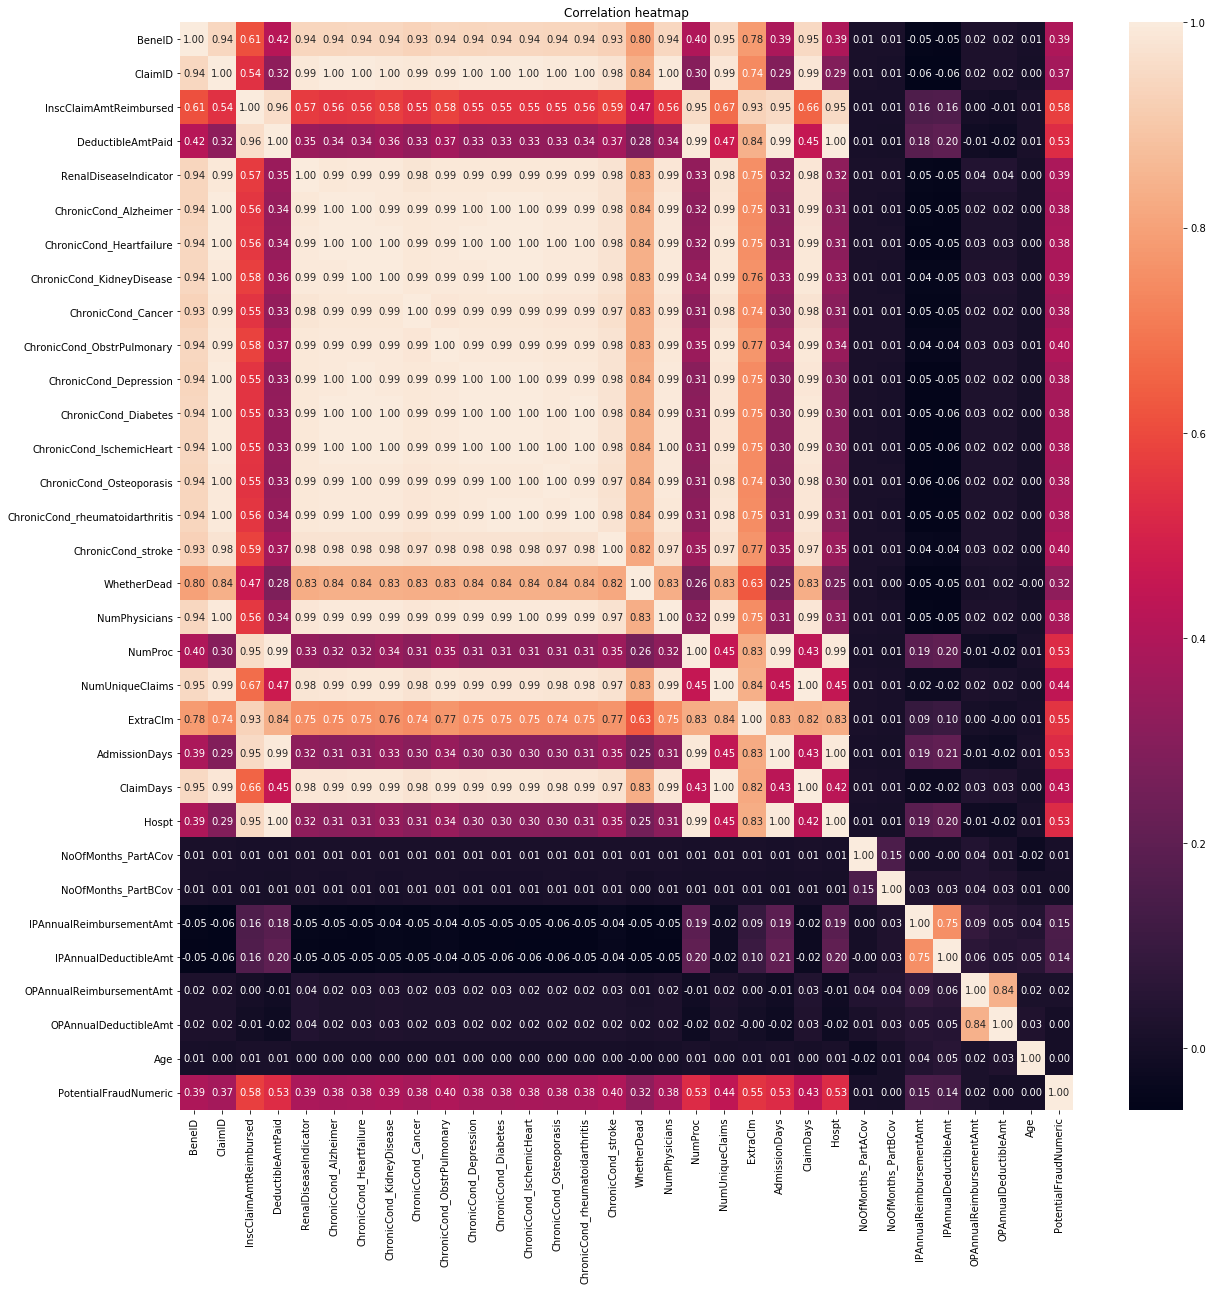

<Figure size 432x288 with 0 Axes>

In [49]:
#Creating Correlation heatmap matrix for teh df2 table.
import seaborn as sns
plt.figure(figsize=(20, 20))
plt.title('Correlation heatmap')
sns.heatmap(df2.corr(),annot=True,fmt='.2f')
plt.show()
plt.savefig('heatmap.png')

In [50]:
countFraud = train.PotentialFraudNumeric.value_counts()
print('No:', countFraud[0])
print('Yes:', countFraud[1])
print('Proportion:', round(countFraud[1] / countFraud[0], 2))
### We should keep in mind that we are using unbalanced data

No: 4904
Yes: 506
Proportion: 0.1


In [51]:
#Splitting the data
### Only Train dataset is labeled that why we split it to two sets train and validation
X_train, X_val, y_train, y_val = train_test_split(df.drop(['Provider'], axis = 1), train.PotentialFraudNumeric.to_numpy(), test_size=0.25, random_state=1)

cols = X_train.columns
print(cols)

X_train = StandardScaler().fit_transform(X_train)
print(X_train)
X_val = StandardScaler().fit_transform(X_val)
print(X_val)

print("Train obs: {}; Features Number: {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation obs: {};".format(X_val.shape[0]))

Index(['BeneID', 'ClaimID', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'WhetherDead',
       'NumPhysicians', 'NumProc', 'NumUniqueClaims', 'ExtraClm',
       'AdmissionDays', 'ClaimDays', 'Hospt', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age'],
      dtype='object')
[[-0.34690276 -0.30509949 -0.35988565 ... -0.3337158  -0.4992191
   0.62342419]
 [-0.15534009 -0.19156836 -0.3229503  ... -0.13921422  0.18961235
  -1.1874672 ]
 [-0.12891766 -0.15028431 -0.31056755 ...  0.00838052 -0.08484946
  -

In [52]:
## write Master Learn class which we are going to use for our analysis
class MasterL:
    
    def __init__(self, model, #### model is a method which we are going to use for detecting FRAUDS. For example: sklearn.svm
                 X= X_train, y= y_train, test= X_val, ### data
                 **kvars  #### additional key parameters for model
                ):
        self.clf = model( **kvars)
        self.methodname = model.__name__
        self.X_train = X
        self.y_train = y
        self.X_test = test
        self.fit(self.X_train, self.y_train)
        self.predicted = self.predict(test)
        
    def fit (self, X, y):
        self.clf.fit(X, y)
    
    def predict(self, x):
        return self.clf.predict(x)
       
    def get_score(self, y = y_val, roc = True, params = False):
        accuracy = accuracy_score(self.predicted, y)
        if params:
            print(self.clf.get_params())
        print(self.methodname+ " metrics:\n")
        print(" Accuracy Score: %.2f%%" % (accuracy * 100.0))
        print(" Confusion matrix:", "\n",confusion_matrix(y_true=y, y_pred=self.predicted))
        print( 'Classification report:\n', classification_report(y, self.predicted))
        if roc:
            print(" ROC Score: %.2f%%" % (roc_auc_score(y, self.clf.predict_proba(self.X_test)[:,1])))
        
    def plot_curves(self, y = y_val):   
        plt.figure(figsize=(17, 5))
        plt.subplot(131)
        # Plot the recall precision tradeoff        
        self.plot_pr_curve(y)
        plt.subplot(132)        
        self.plot_lern_curve(accuracy_score)     
        plt.subplot(133)
        self.plot_lern_curve(roc_auc_score)
        plt.show()
        
    def plot_pr_curve(self, y = y_val):
        
        plt.subplot(122)
        # Calculate average precision and the PR curve
        average_precision = average_precision_score(y, self.predicted)

        # Obtain precision and recall 
        precision, recall, _ = precision_recall_curve(y, self.clf.predict_proba(self.X_test)[:,1])
        
        plt.step(recall, precision, where='post')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.05])
        plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format( average_precision))
    
    def plot_lern_curve(self, metrics):
        plt.title(self.methodname + " Learning Curves")
        plt.xlabel("Training examples")
        plt.ylabel("{}".format(' '.join(metrics.__name__.split('_')).title()))
        
        train_sizes, train_scores, test_scores = learning_curve(self.clf, self.X_train, self.y_train, n_jobs=-1, 
                                                                cv = ShuffleSplit(n_splits=5, test_size=.25 , random_state = 5), 
                                                                train_sizes=np.linspace(0.5, 1.0, 10), scoring = make_scorer(metrics))
        train_scores_mean = np.mean(train_scores, axis=1) 
        test_scores_mean = np.mean(test_scores, axis=1) 
        #plt.grid()

        plt.plot(train_sizes,  train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes,  test_scores_mean, 'o-', color="g", label="Cross-validation score")
        
        plt.legend(loc="best")
    
    def plot_roc_curve(self, y = y_val, models = None, fig = None):
        fig = plt.figure(figsize=(15, 7))
        ax = fig.add_subplot(121)
        
        self.roc_curves(ax, y, models)
        
        ax.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        
        plt.legend(loc="best")
        
        #if fig != None:
            #plt.savefig( fig, bbox_inches = 'tight')
       
    def roc_curves(self, p, y, M):
        if M == None:
            fpr, tpr, thresholds = roc_curve(y, self.clf.predict_proba(self.X_test)[:,1] )
            p.plot(fpr, tpr,  label=self.methodname )
        else:
            fpr, tpr, thresholds = roc_curve(y, self.clf.predict_proba(self.X_test)[:,1] )
            p.plot(fpr, tpr,  label=self.methodname )
            for i in M:
                fpr, tpr, thresholds = roc_curve(y, i.clf.predict_proba(i.X_test)[:,1] )
                p.plot(fpr, tpr,  label=i.methodname )

#### Function for serching best parameters which is fiting the model and shows best results for specified method.               
def grid(method, parameters):
    
    grid_1 = GridSearchCV(method, parameters, scoring = make_scorer(accuracy_score), cv=5, n_jobs = -1)
    grid_2 = GridSearchCV(method, parameters, scoring = make_scorer(roc_auc_score), cv=5, n_jobs = -1)
    
    grid_1.fit(X_train, y_train)
    print('Best parameters using accuracy score:')
    print(grid_1.best_params_)

    grid_2.fit(X_train, y_train)
    print('Best parameters usin ROC accuracy score:')
    print(grid_2.best_params_)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer, precision_recall_curve, average_precision_score
### Logistic regression 
### Balanced Weight and Scaled data
ML1 = MasterL(LogisticRegression, 
              penalty= 'l1',
              solver= 'liblinear', class_weight='balanced', random_state = 5 , C = 0.001)
# Get your performance metrics
ML1.get_score()

LogisticRegression metrics:

 Accuracy Score: 83.74%
 Confusion matrix: 
 [[1023  210]
 [  10  110]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90      1233
           1       0.34      0.92      0.50       120

    accuracy                           0.84      1353
   macro avg       0.67      0.87      0.70      1353
weighted avg       0.93      0.84      0.87      1353

 ROC Score: 0.94%


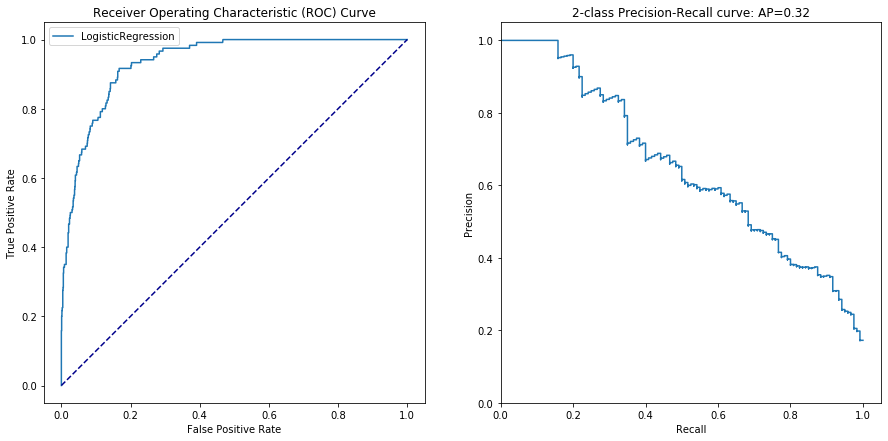

In [54]:
ML1.plot_roc_curve()
ML1.plot_pr_curve()

In [55]:
#svm
from sklearn.svm import SVC
# SVM(scaled data)
ML2 = MasterL(SVC, 
              gamma = 'auto', probability = True, random_state= 5, class_weight= 'balanced', C=1 )

# Get your performance metrics
ML2.get_score()

SVC metrics:

 Accuracy Score: 85.07%
 Confusion matrix: 
 [[1046  187]
 [  15  105]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      1233
           1       0.36      0.88      0.51       120

    accuracy                           0.85      1353
   macro avg       0.67      0.86      0.71      1353
weighted avg       0.93      0.85      0.88      1353

 ROC Score: 0.92%


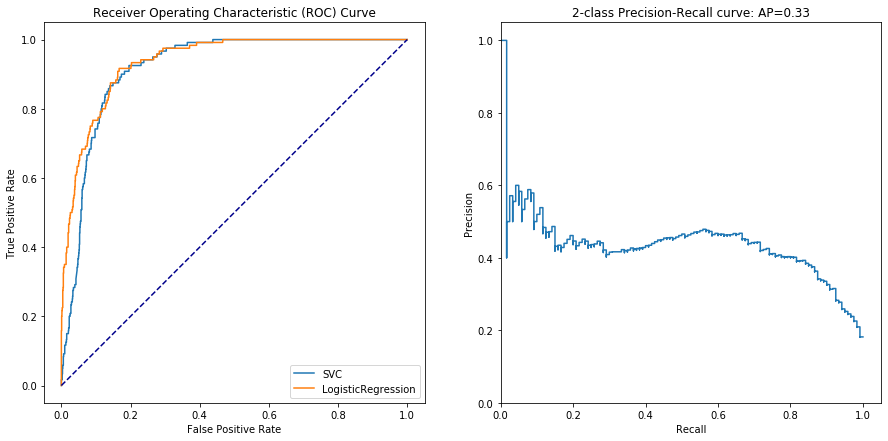

In [56]:
ML2.plot_roc_curve(models = [ML1])
ML2.plot_pr_curve()

In [57]:
### Random Forest Clasifier
# Continue fitting the model and obtain predictions
from sklearn.ensemble import RandomForestClassifier, IsolationForest, VotingClassifier
ML3 = MasterL(RandomForestClassifier, 
              n_estimators = 60, n_jobs = -1, random_state = 5, class_weight = 'balanced_subsample', 
              min_samples_split = 0.25
             )
 
# Get your performance metrics
ML3.get_score()

RandomForestClassifier metrics:

 Accuracy Score: 78.42%
 Confusion matrix: 
 [[950 283]
 [  9 111]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.77      0.87      1233
           1       0.28      0.93      0.43       120

    accuracy                           0.78      1353
   macro avg       0.64      0.85      0.65      1353
weighted avg       0.93      0.78      0.83      1353

 ROC Score: 0.92%


In [58]:
from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve, GridSearchCV, KFold
kf = KFold(n_splits=5)
est = np.linspace(10, 200, 39)

RandFo = dict() 
def kind_GridSearchCV(i):
    acScore = list()
    rocScore = list()    
    for train_index, test_index in kf.split(X_train):
        Xtrain, Xtest = X_train[train_index], X_train[test_index]
        ytrain, ytest = y_train[train_index], y_train[test_index]
        RandFo[i] = RandomForestClassifier(n_estimators =  i, n_jobs = -1, random_state = 5, 
                                           class_weight = 'balanced_subsample', min_samples_split = 0.25 )
        RandFo[i].fit(Xtrain, ytrain)
        acScore.append(accuracy_score(RandFo[i].predict(X_val), y_val))
        rocScore.append(roc_auc_score(y_val, RandFo[i].predict_proba(X_val)[:,1]))

    return  [ i, np.mean(acScore), np.mean(rocScore) ]

scores = list()
for i in est:
    scores.append(kind_GridSearchCV(int(i)))

scoresD = pd.DataFrame(scores, columns = ['N_est', 'Accuracy', "ROC accuracy"])

print(scoresD.sort_values(by=['Accuracy'], ascending=False).iloc[0])
print(scoresD.sort_values(by=["ROC accuracy"], ascending=False).iloc[0])

N_est           25.000000
Accuracy         0.787435
ROC accuracy     0.917703
Name: 3, dtype: float64
N_est           80.000000
Accuracy         0.782114
ROC accuracy     0.922477
Name: 14, dtype: float64


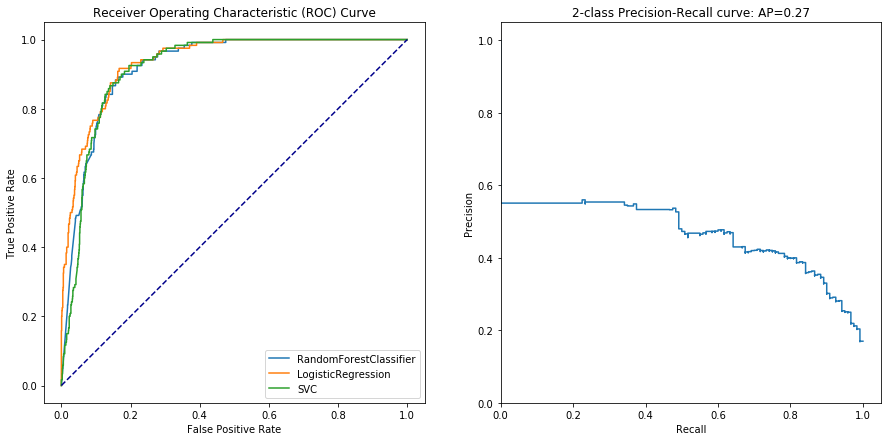

In [59]:
ML3.plot_roc_curve(models = [ML1, ML2])
ML3.plot_pr_curve()

In [60]:
features = ML3.clf.feature_importances_
Features_score = pd.DataFrame(np.array([cols, features]).T, columns = ["VarName", "Importamce"]).sort_values(by=["Importamce"], ascending=False)

Features_score.head()

,VarName,Importamce
21,AdmissionDays,0.159161
2,InscClaimAmtReimbursed,0.140527
3,DeductibleAmtPaid,0.113984
20,ExtraClm,0.105328
18,NumProc,0.0806452


In [61]:
#Multi-layer Perceptron classifier(MLP)
from sklearn.neural_network import MLPClassifier
### Multy Layer Perceptron
ML4 = MasterL( MLPClassifier, 
              activation = 'logistic',
              hidden_layer_sizes = (1, 3),random_state = 5, max_iter= 1000 )
# Get your performance metrics 
ML4.get_score()

MLPClassifier metrics:

 Accuracy Score: 91.65%
 Confusion matrix: 
 [[1158   75]
 [  38   82]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1233
           1       0.52      0.68      0.59       120

    accuracy                           0.92      1353
   macro avg       0.75      0.81      0.77      1353
weighted avg       0.93      0.92      0.92      1353

 ROC Score: 0.94%


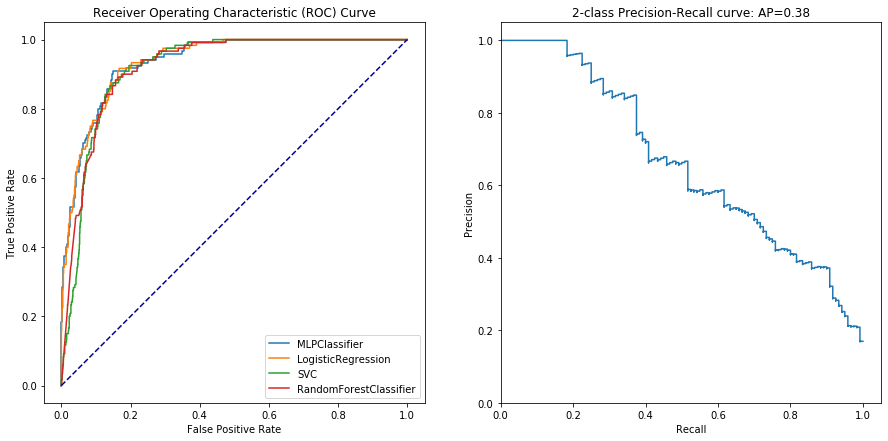

In [62]:
ML4.plot_roc_curve(models = [ML1, ML2, ML3])
ML4.plot_pr_curve()